In [69]:
import numpy as np
import pandas as pd

# Question1
## (a)

n = 100, p = 2

In [70]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)

## (b)

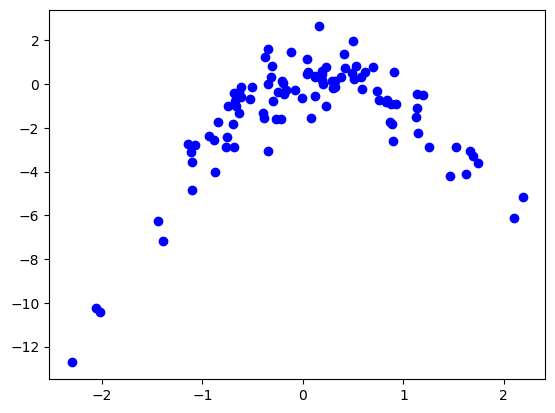

In [71]:
import matplotlib.pyplot as plt
plt.scatter(x, y, c ="blue")
 
plt.show()

## (c)

In [78]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2 * x**2 + np.random.normal(size=100)
d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)

In [73]:
form = [ 'y ~ x', 
        'y ~ x + np.power(x, 2)',
        'y ~ x + np.power(x, 2) + np.power(x, 3)',
        'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)']

In [74]:
def mse(y_pred, y):
    return np.sum(np.square(y_pred - y)) / y.size

In [80]:
import statsmodels.formula.api as smf
np.random.seed(50)
for f in form:
        y_pred = []
        for i in range(df.shape[0]):
            train = df.index != i
            model_ols = smf.ols(formula=f, data=df[train]).fit()
            y_hat = model_ols.predict(df[~train])
            y_pred.append(y_hat)
        print(mse(np.array(y_pred).squeeze() , y))

6.260764331604616
0.9142897072803664
0.9268768781648808
0.8669116865881088


## (d)
因為每次只刪去一個數值，不會有隨機效果，與(c)答案相同

In [81]:
np.random.seed(1000)
for f in form:
        y_pred = []
        for i in range(df.shape[0]):
            train = df.index != i
            model_ols = smf.ols(formula=f, data=df[train]).fit()
            y_hat = model_ols.predict(df[~train])
            y_pred.append(y_hat)
        print(mse(np.array(y_pred).squeeze() , y))

6.260764331604616
0.9142897072803664
0.9268768781648808
0.8669116865881088


## (e)
題目(c)中第四項式子有最小的LOOCV error，但我們預期第二項式子會有更小的error，因為原先的式子即是二次方的形式。
## (f)
可發現只有在常數項與x之一次方與二次方項為顯著t值，因此我們可以認定表現最好的為二次方的形式。

In [77]:
display(model_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     251.4
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           2.75e-49
Time:                        22:31:48   Log-Likelihood:                -133.69
No. Observations:                  99   AIC:                             277.4
Df Residuals:                      94   BIC:                             290.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3115      0.140     -2.226      0.028      -0.589      -0.034
x                  1.0567      0.156      6.761      0.000       0.746       1.367
np.power(x, 2)    -1.8796      0.170    -11.072      0.000      -2.217      -1.543
np.power(x, 3)    -0.0014      0.039     -0.037      0.971      -0.079       0.077
np.power(x, 4)    -0.0067      0.026     -0.257      0.798      -0.058       0.045
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.014
Skew:                           0.029   Prob(JB):                        0.993
Kurtosis:                       3.003   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question2
## (a)

In [9]:
boston = pd.read_csv(r"C:\Users\user\Desktop\機器學習助教\Boston.csv")
del boston["Unnamed: 0"]

In [10]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
medv_mean = boston["medv"].mean()
print(medv_mean)

22.532806324110698


## (b)

In [13]:
medv = boston["medv"]
print(np.std(medv) / np.sqrt(len(medv)))

0.4084569346972867


## (c)
if we sampling 10000 times

In [61]:
select = []
for i in range(10000):
    boot = []
    rand_number = np.random.randint(low = 0, high = 506, size = 506)
    for i in rand_number:
        boot.append(medv[i])
    select += [np.mean(boot)]
print(select)

[23.268774703557312, 22.402964426877475, 22.80909090909091, 22.894664031620554, 22.733399209486166, 22.721146245059288, 22.036758893280634, 22.00731225296443, 23.048616600790513, 23.20612648221344, 22.412648221343876, 22.261660079051385, 22.373715415019763, 22.400592885375495, 22.096442687747036, 22.005731225296444, 22.382213438735178, 22.872529644268774, 21.809683794466405, 22.65395256916996, 22.35217391304348, 22.157312252964427, 21.98913043478261, 22.012252964426878, 21.772727272727273, 22.679051383399205, 23.17094861660079, 22.846442687747036, 22.61581027667984, 22.72055335968379, 21.95830039525692, 22.66640316205534, 21.970158102766803, 22.188735177865613, 22.50079051383399, 22.397628458498026, 22.121343873517787, 23.20513833992095, 22.92075098814229, 23.306521739130435, 22.116403162055338, 22.992687747035575, 22.507114624505927, 23.023122529644265, 22.223517786561267, 22.234584980237155, 21.887944664031618, 22.38695652173913, 22.242094861660078, 22.692687747035574, 22.39466403162

In [62]:
print('bootstrap_standard_error:', np.std(select))

bootstrap_standard_error: 0.4105752230173916


In [82]:
print('0.025:', medv_mean - 2 * np.std(select) )
print('0.975:', medv_mean + 2 * np.std(select) )

0.025: 21.711655878075916
0.975: 23.35395677014548


## (e)

In [47]:
medv_median = boston["medv"].median()
print(medv_median)

21.2


## (f)
與原先mean的standard error數值差異不大

In [51]:
select_median = []
for i in range(10000):
    boot = []
    rand_number = np.random.randint(low = 0, high = 506, size = 506)
    for i in rand_number:
        boot.append(medv[i])
    select_median.append(np.median(boot))
print(select_median)

[21.4, 21.6, 20.7, 20.7, 21.4, 21.2, 20.8, 21.45, 20.9, 20.65, 20.8, 21.7, 21.7, 21.05, 21.45, 21.0, 21.4, 21.95, 21.4, 20.65, 21.5, 21.4, 21.2, 21.4, 20.5, 21.7, 20.85, 21.0, 21.7, 21.299999999999997, 21.5, 21.2, 21.0, 21.4, 20.6, 21.4, 21.7, 20.7, 20.75, 21.45, 21.4, 21.4, 21.7, 21.0, 21.299999999999997, 21.7, 21.7, 21.5, 21.2, 21.1, 20.8, 21.55, 20.9, 21.15, 20.7, 21.4, 20.65, 20.65, 21.9, 20.65, 21.2, 20.3, 20.95, 21.0, 21.45, 21.4, 21.2, 21.1, 20.8, 21.299999999999997, 20.7, 21.4, 21.7, 21.4, 21.45, 21.5, 20.5, 21.2, 21.7, 21.5, 21.2, 21.7, 20.9, 21.7, 21.7, 20.75, 20.95, 20.6, 21.55, 21.2, 21.0, 21.7, 21.75, 21.2, 21.1, 20.65, 21.45, 21.05, 21.2, 21.2, 21.299999999999997, 21.05, 21.4, 21.4, 21.2, 21.55, 21.4, 20.6, 21.4, 20.75, 21.4, 21.5, 21.65, 20.6, 21.1, 20.85, 21.299999999999997, 21.1, 20.9, 21.0, 20.65, 21.55, 21.7, 21.2, 20.5, 21.55, 20.9, 20.2, 21.55, 21.2, 21.2, 21.2, 21.6, 21.7, 20.1, 21.2, 21.299999999999997, 21.55, 21.65, 21.2, 21.6, 21.55, 20.9, 20.8, 21.7, 21.2, 21.

In [65]:
print('bootstrap_median:', np.std(select_median))

bootstrap_median: 0.37569836518143085


## (g)

In [49]:
tenth_percentile = np.percentile(medv, 10)
print('tenth_percentile: ',tenth_percentile)

tenth_percentile:  12.75


## (h)
會受到尾部極端質影響，standard error相對比較高

In [57]:
select_tenth = []
for i in range(10000):
    boot = []
    rand_number = np.random.randint(low = 0, high = 506, size = 506)
    for i in rand_number:
        boot.append(medv[i])
    select_tenth.append(np.percentile(boot, 10))
print(select_tenth)

[13.3, 12.649999999999999, 12.7, 10.9, 12.8, 12.7, 12.899999999999999, 12.7, 12.55, 12.2, 12.2, 12.4, 12.8, 13.1, 12.8, 13.149999999999999, 13.1, 12.85, 13.0, 12.6, 13.05, 13.4, 12.5, 13.3, 12.6, 12.7, 13.1, 13.1, 12.8, 13.149999999999999, 12.7, 12.4, 13.1, 13.350000000000001, 12.6, 13.149999999999999, 13.3, 12.7, 13.1, 12.6, 13.1, 13.2, 12.7, 13.2, 12.3, 13.6, 13.3, 13.1, 13.4, 12.7, 11.9, 13.05, 12.7, 12.75, 13.45, 12.7, 13.149999999999999, 12.5, 12.95, 13.25, 12.7, 13.1, 12.4, 13.1, 12.7, 12.6, 12.75, 13.4, 11.6, 13.1, 12.1, 12.55, 12.7, 12.75, 12.6, 13.1, 13.3, 11.75, 13.1, 13.3, 12.1, 12.7, 13.0, 12.85, 13.1, 12.899999999999999, 13.4, 13.1, 11.9, 13.3, 11.9, 11.75, 13.3, 13.1, 12.6, 12.649999999999999, 12.7, 13.1, 12.7, 13.149999999999999, 12.7, 12.0, 12.649999999999999, 12.7, 12.7, 13.9, 13.350000000000001, 12.7, 13.05, 13.350000000000001, 13.3, 13.4, 12.8, 11.9, 12.3, 12.85, 13.3, 12.55, 12.8, 12.7, 12.45, 12.649999999999999, 12.55, 13.149999999999999, 12.649999999999999, 12.6, 

In [66]:
print('bootstrap_tenth_percentile:', np.std(select_tenth))

bootstrap_tenth_percentile: 0.5054630914072757
